In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_predict(x, y):
    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    learning_rate = .05
    lossfun = nn.MSELoss()

    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learning_rate)
    
    numepochs = 500


    for epochi in range(numepochs):
        yHat = ANNreg(x)
        loss = lossfun(yHat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNreg(x)
    return predictions, loss

In [3]:
def create_data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m*x + torch.randn(N, 1)/2
    
    return x, y

In [4]:
slopes = np.linspace(-2, 2, 21)
losses = np.zeros((len(slopes), 50))
corellations = np.zeros((len(slopes), 50))

for i in range(50):
    for idx, slope in enumerate(slopes):
        x, y = create_data(slope)
        predictions, loss = get_predict(x, y)
        losses[idx, i] = loss.detach()
        correlation = np.corrcoef(y.T, predictions.detach().T)[0,1]
        corellations[idx, i] = correlation


corellations[np.isnan(corellations)] = 0        
final_corr = np.mean(corellations, axis=1)
final_losses = np.mean(losses, axis=1)


/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


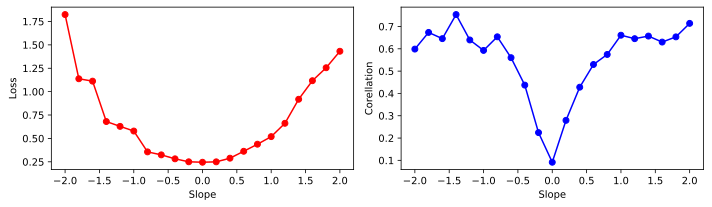

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].plot(slopes, final_losses, 'ro-')
ax[1].plot(slopes, final_corr, 'bo-')


ax[0].set_xlabel('Slope')
ax[1].set_xlabel('Slope')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Corellation')

plt.tight_layout()
plt.show()
